In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def normal_pdf(x, mean, std):
    return np.exp(-(x - mean)**2 / (2 * std**2)) / (std * np.sqrt(2 * np.pi))

In [22]:
x = np.linspace(0, 100, 1000)
genuine_dist = normal_pdf(x, 30, 10)
impostor_dist = normal_pdf(x, 60, 15)

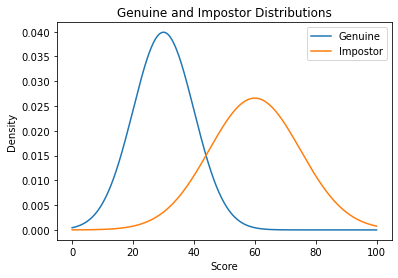

In [23]:
plt.plot(x, genuine_dist, label='Genuine')
plt.plot(x, impostor_dist, label='Impostor')
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Genuine and Impostor Distributions')
plt.legend()
plt.show()

In [33]:
def calculate_far_frr(threshold, genuine_dist, impostor_dist):
    far = np.sum(impostor_dist[np.where(x < threshold)]) * (100/1000)  
    frr = np.sum(genuine_dist[np.where(x >= threshold)]) * (100/1000) 
    return far,frr

In [34]:
threshold_50 = 50
far_50, frr_50 = calculate_far_frr(threshold_50, genuine_dist, impostor_dist)
print("For threshold η = 50:")
print("FAR:", far_50)
print("FRR:", frr_50)

For threshold η = 50:
FAR: 0.25220845477856263
FRR: 0.022726931441217846


In [35]:
threshold_75 = 75
far_75, frr_75 = calculate_far_frr(threshold_75, genuine_dist, impostor_dist)
print("\nFor threshold η = 75:")
print("FAR:", far_75)
print("FRR:", frr_75)


For threshold η = 75:
FAR: 0.8408756025445561
FRR: 3.3542422761300365e-06


In [36]:
thresholds = np.linspace(0, 100, 1000)
fars = []
frrs = []

for threshold in thresholds:
    far, frr = calculate_far_frr(threshold, genuine_dist, impostor_dist)
    fars.append(far)
    frrs.append(frr)

fars = np.array(fars)
frrs = np.array(frrs)

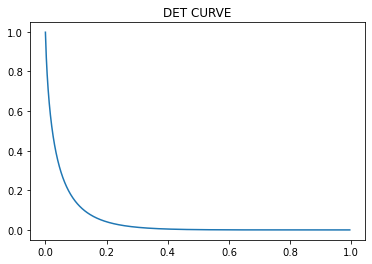

In [37]:
plt.plot(fars,frrs)
plt.title("DET CURVE")
plt.show()

In [38]:
auc_det = np.mean(frrs)
print("auc of det : ",auc_det)

auc of det :  0.3004361088449493


Text(0.5, 1.0, 'ROC CURVE')

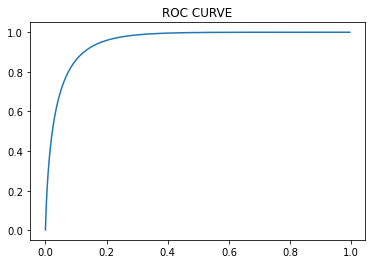

In [39]:
tprs = []
for frr in frrs:
    tprs.append(1-frr)
plt.plot(fars,tprs)
plt.title("ROC CURVE")

In [40]:
auc_roc = np.mean(tprs)
print("auc of roc : ",auc_roc)

auc of roc :  0.6995638911550507
